# Data exploration

In [4]:
run preprocess.py

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
data.sex.describe()

count      17592
unique         2
top       female
freq        9016
Name: sex, dtype: object

In [9]:
get_names()

T1_12-13 region
T1_20 population
T1_57-58 cigarettes
T1_59-60 cigars
T3_14 drink_loc1
T3_15 drink_loc2
T5_24-25 political_espectrum
T5_27-28 age
T5_44-45 income
T5_67-68 day
T5_69-70 month
T5_71-72 year
T5_74-75 occupation
T5_77-78 socioeconomic_condition
T5_26 sex
T5_73 education_level
T5_76 sector
T5_79 status


In [33]:
data.region.value_counts()

Murcia                   1621
Andalusia                1354
Catalonia                1317
Vasque Country           1298
Madrid                   1215
Community of Valencia    1115
Galicia                  1039
Castilla y Leon          1021
Castilla - La Mancha      938
Canary Islands            920
Aragon                    903
Extremadura               888
Asturias                  800
Balearic Islands          800
Cantabria                 800
La Rioja                  796
Navarre                   791
Name: region, dtype: int64

In [37]:
data.population.describe()

count    1.759800e+04
mean     2.870503e+05
std      6.089171e+05
min      1.000000e+03
25%      6.000000e+03
50%      3.000000e+04
75%      2.500000e+05
max      2.500000e+06
Name: population, dtype: float64

In [41]:
data.population.isna().sum()

18

<AxesSubplot:>

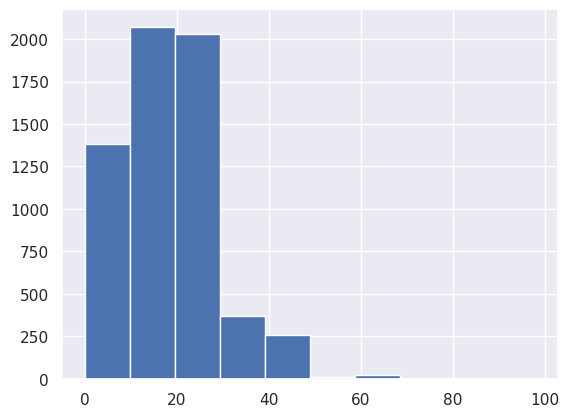

In [44]:
data.cigarettes.hist()

<AxesSubplot:>

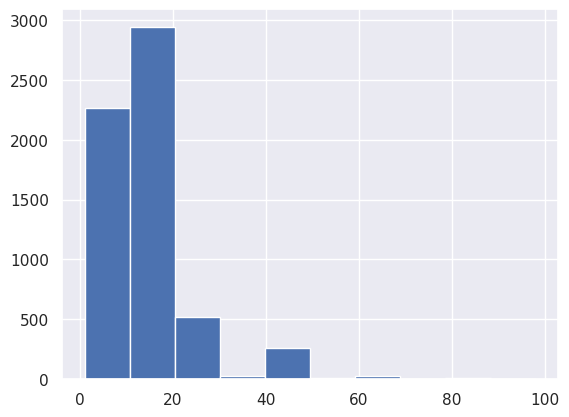

In [53]:
data.query("cigarettes > 0").cigarettes.hist()

<AxesSubplot:>

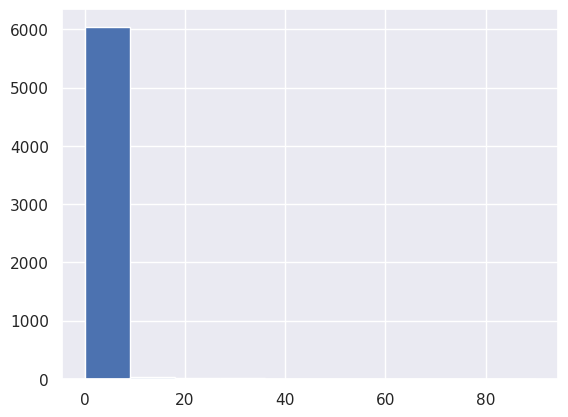

In [45]:
data.cigars.hist()

In [46]:
data.cigars.describe()

count    6109.000000
mean        0.387789
std         2.875282
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        90.000000
Name: cigars, dtype: float64

<AxesSubplot:>

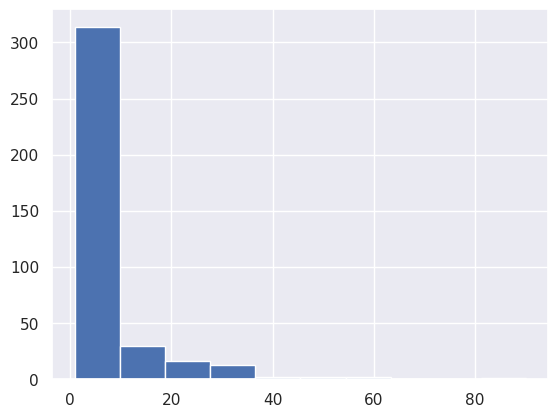

In [50]:
data.query("cigars > 0")["cigars"].hist()

In [51]:
data.query("cigars > 0")["cigars"].describe()

count    378.000000
mean       6.267196
std        9.848725
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max       90.000000
Name: cigars, dtype: float64

In [52]:
data.query("cigars > 0")["cigars"].count()

378